### 1-Exploring data samples :

In [ ]:
!pip install wandb

In [1]:
!pip install librosa

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


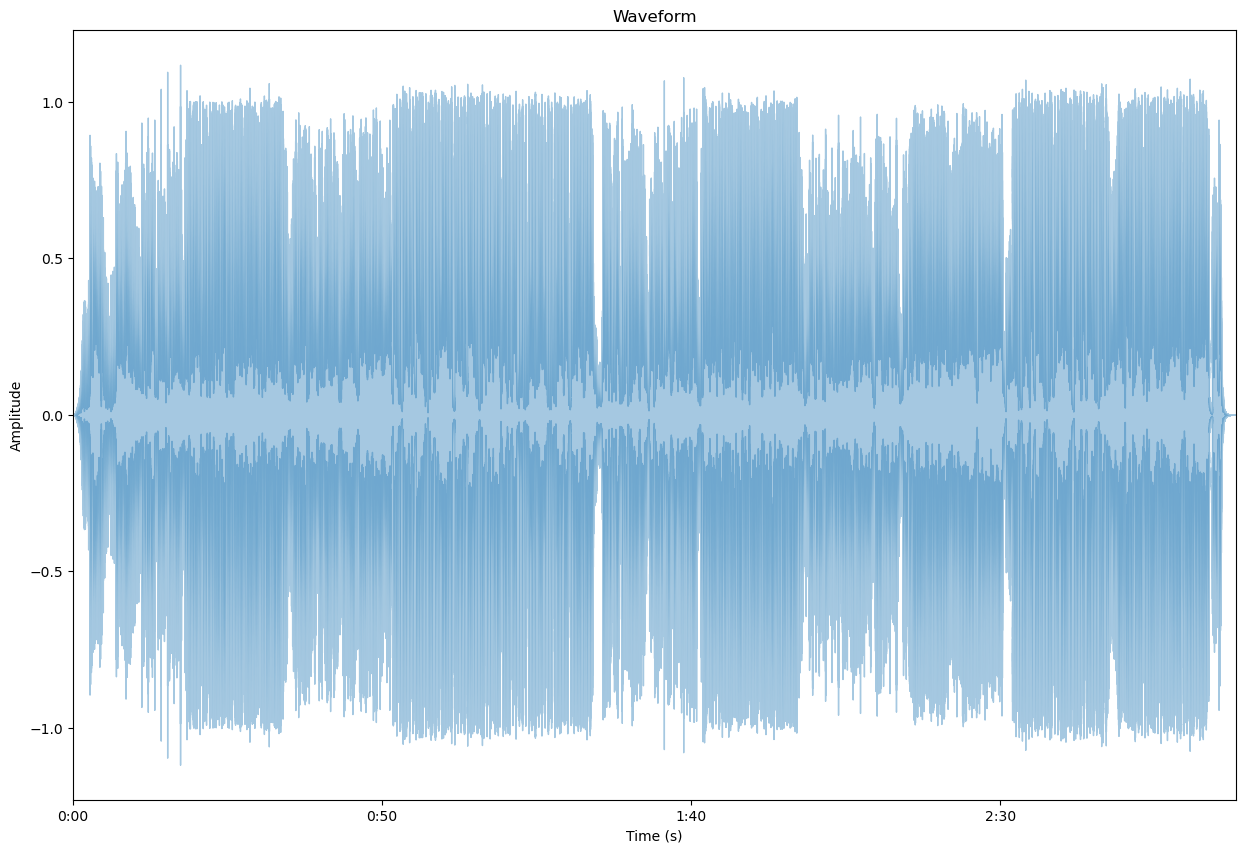

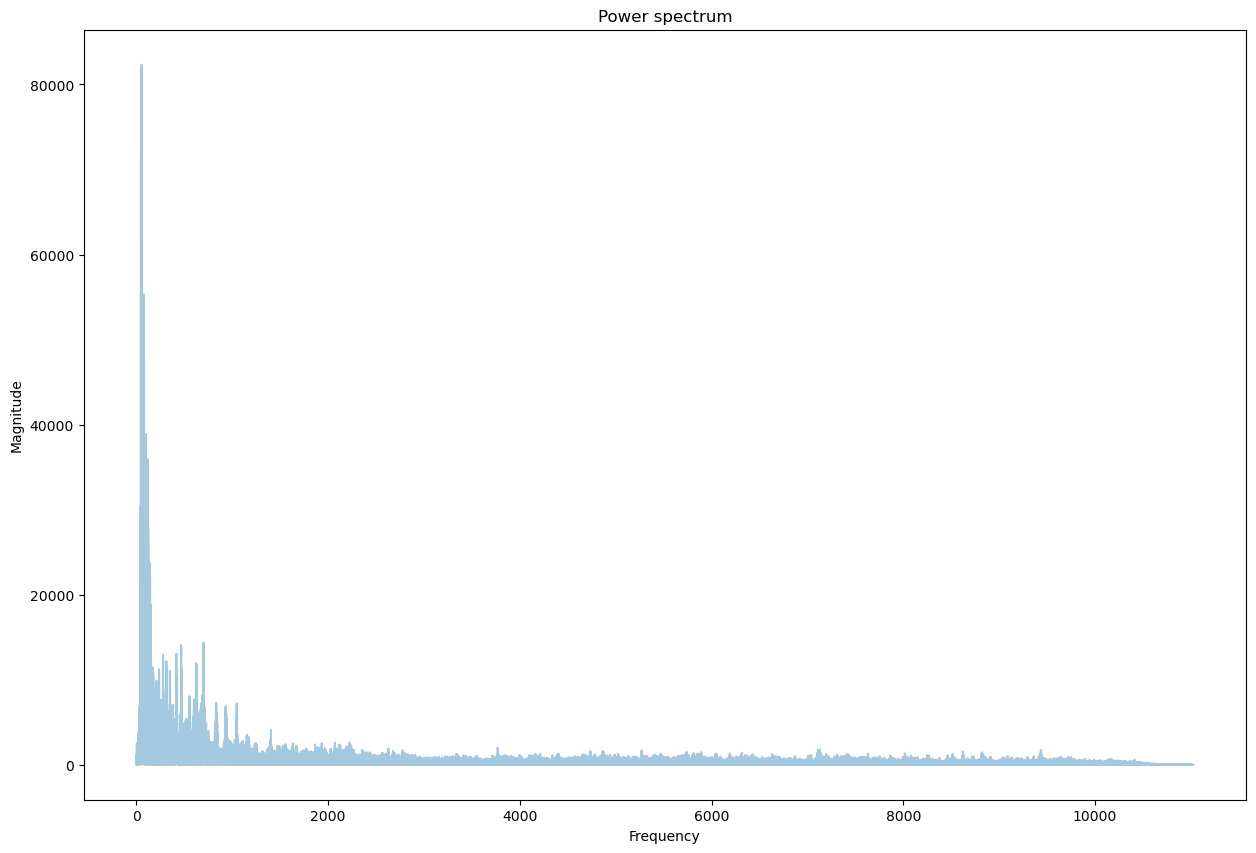

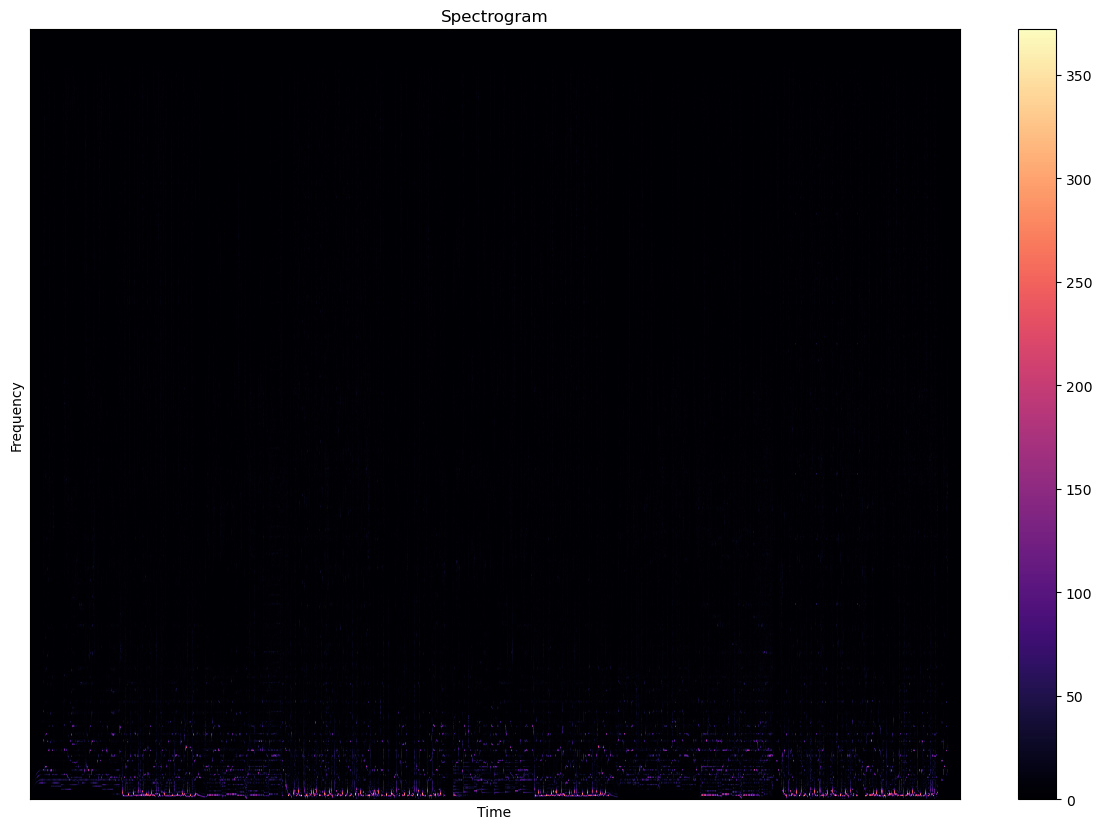

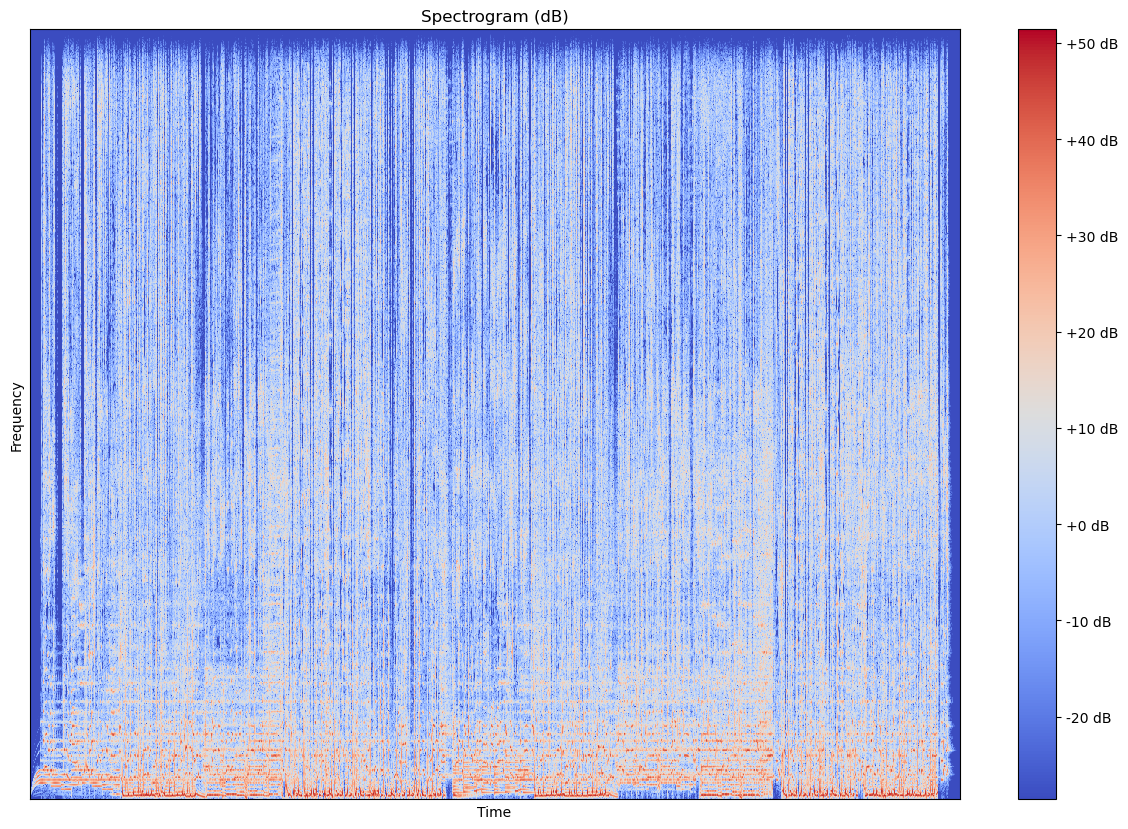

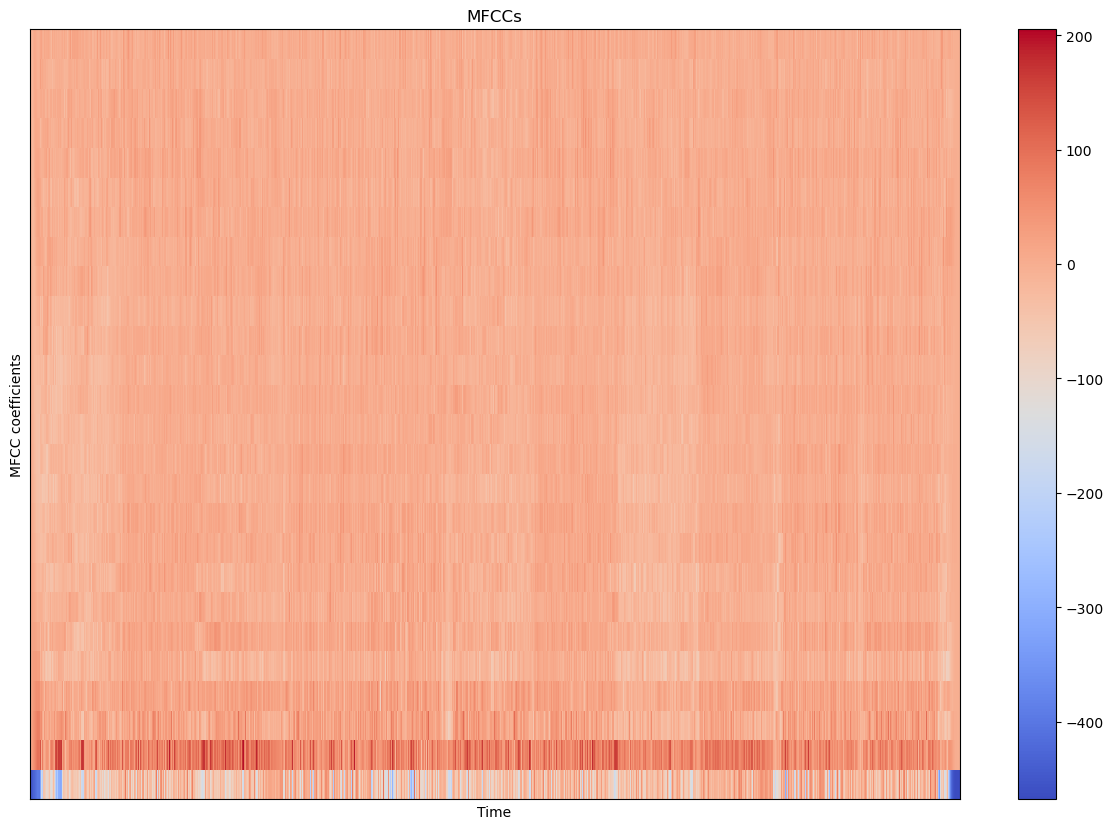

In [1]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)

file = "./Training/Glitch Hop/Arcando - In My Head (feat. Britt Lari) [NCS Release].wav"

# load audio file with Librosa
signal, sample_rate = librosa.load(file, sr=22050)

# WAVEFORM
# display waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")


# FFT -> power spectrum
# perform Fourier transform
fft = np.fft.fft(signal)

# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)

# create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

# plot spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")


# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")
# show plots
plt.show()

# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
# show plots
plt.show()

# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=26)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()

### 2-storing metadata as Json :

In [2]:
import json
import os
import math
import librosa


DATASET_PATH = "./Training"
JSON_PATH = "data_13_6segments.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=26, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.

        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

        # load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print(i,' /',len(list(os.walk(dataset_path))))
                        #print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "a+") as fp:
        json.dump(data, fp, indent=4)
        
        
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=6)



Processing: Training\Bass
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14
1  / 14

Processing: Training\Chill
2  / 14
2  / 14
2  / 14
2  / 14
2  / 14
2  / 14
2  / 14
2  / 14
2  / 14
2  / 14
2  / 14
2  / 14
2  / 14
2  / 14
2  / 14
2  / 14
2

4  / 14
4  / 14
4  / 14
4  / 14
4  / 14
4  / 14
4  / 14
4  / 14
4  / 14
4  / 14
4  / 14
4  / 14

Processing: Training\Dubstep
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5  / 14
5 

6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14
6  / 14


7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14
7  / 14

Processing: Training\Glitch Hop
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14
8  / 14

Processing: Training\Hardstyle
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14
9  / 14

10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
10  / 14
1

13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
1

13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14
13  / 14


### 3-example of model with regulerization , batch normalization :

In [2]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

# path to json file that stores MFCCs and genre labels for each processed segment
DATA_PATH = "data_13_6segments.json"

def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


In [4]:
# get train, validation, test splits
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

In [5]:
X_train[1].shape

(216, 26, 1)

In [ ]:
# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(X_train[1].reshape((216, 26)), sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()

In [7]:
(882,323, 26, 1)

(882, 323, 26, 1)

number of observations in the train dataset : 2646
MFCCs : 323


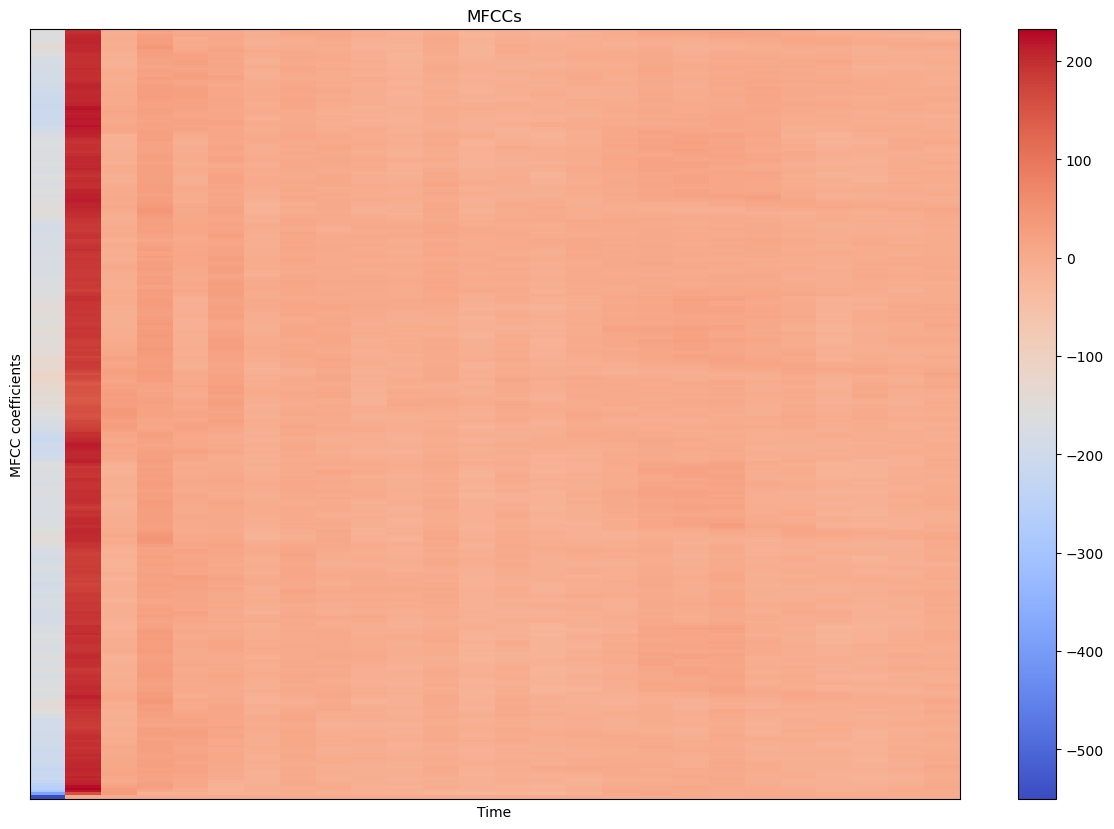

In [38]:

skf = StratifiedKFold(n_splits = 4, random_state = 7, shuffle = True) 
fold = 1
for train_index, val_index in skf.split(np.zeros(len(X_train)),y_train):
    print("number of observations in the train dataset :",len(train_index))
    for index in train_index:
        training_data = X_train[index]
        print("MFCCs :",len(training_data))
        plt.figure(figsize=FIG_SIZE)
        librosa.display.specshow(training_data.reshape((323, 26)), sr=sample_rate, hop_length=hop_length)
        plt.xlabel("Time")
        plt.ylabel("MFCC coefficients")
        plt.colorbar()
        plt.title("MFCCs")
        # show plots
        plt.show()
        break
    break
    fold+=1

In [56]:
training_data=[]
training_labels=[]
validation_data=[]
validation_labels=[]
skf = StratifiedKFold(n_splits = 4, random_state = 7, shuffle = True) 
fold = 1
for train_index, val_index in skf.split(np.zeros(len(X_train)),y_train):
    print("number of train observations in the train dataset :",len(train_index))
    print("number of validation observations in the train dataset :",len(val_index))
    print(len(y_train),len(y_validation))
    for index_t in val_index:
        training_data.append(X_train[index_t])
        training_labels.append(y_train[index_t])
    for index_v in val_index:
        validation_data.append(X_train[index_v])
        validation_labels.append(
            y_train[index_v])

number of train observations in the train dataset : 2646
number of validation observations in the train dataset : 882
3528 882
number of train observations in the train dataset : 2646
number of validation observations in the train dataset : 882
3528 882
number of train observations in the train dataset : 2646
number of validation observations in the train dataset : 882
3528 882
number of train observations in the train dataset : 2646
number of validation observations in the train dataset : 882
3528 882


In [44]:
!wandb login ab631efc36e2c87f5f54d82b5cdbd6c501d5221f

wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Aymen/.netrc


In [14]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "data_13_6segments.json"

tf.compat.v1.keras.regularizers.L2(
    l2=0.01, **kwargs
)
tf.compat.v1.keras.regularizers.L1L2(l1=1e-5, l2=1e-4)


def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history['acc'], label="train accuracy")
    axs[0].plot(history.history["val_acc"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates CNN model

    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, 
                                  (3, 3),
                                  kernel_initializer='he_normal',
                                  activation='relu',
                                  input_shape=(input_shape),
              kernel_regularizer="l1_l2",
              bias_regularizer="l2",
                activity_regularizer="l2")
                                 )
    model.add(keras.layers.MaxPooling2D((3, 3),
                                        strides=(2, 2), 
                                        padding='same'),
                                        )
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, 
                                  (3, 3), 
                                  activation='relu'),
              kernel_regularizer="l1_l2",
              bias_regularizer="l2",
                activity_regularizer="l2")
    model.add(keras.layers.MaxPooling2D((3, 3),
                                        strides=(2, 2), 
                                        padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'),
              kernel_regularizer="l1_l2",
              bias_regularizer="l2",
                activity_regularizer="l2")
    model.add(keras.layers.Dropout(0.18))
    
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.12))

    # output layer
    model.add(keras.layers.Dense(13, activation='softmax'))

    return model


def predict(model, X, y):
    """Predict a single sample using the trained model

    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))

NameError: name 'tf' is not defined

In [15]:
#import wandb
#from wandb.keras import WandbCallback

#wandb.init(project="Music Genre Classification", entity="aymentlili",settings=wandb.Settings(start_method='thread'))
#wandb.config = {
#  "learning_rate":0.0001,
#  "epochs": 70,
#  "batch_size": 32
#}
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import regularizers
checkpoint_path = "train_ckpt/cp.ckpt"
cp_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=False, verbose=1,save_freq=5)
# ... Define a model

all_history=dict()

skf = StratifiedKFold(n_splits = 4, random_state = 7, shuffle = True) 
fold = 1
for train_index, val_index in skf.split(np.zeros(len(X_train)),y_train):
    print("number of observations in the train dataset :",len(train_index))
    training_data=[]
    training_labels=[]
    validation_data=[]
    validation_labels=[]
    for index_t in train_index:
        training_data.append(X_train[index_t])
        training_labels.append(y_train[index_t])
    for index_v in val_index:
        validation_data.append(X_train[index_v])
        validation_labels.append(
            y_train[index_v])
    training_data = np.array(training_data)
    training_labels = np.array(training_labels)
    validation_data = np.array(validation_data)
    validation_labels = np.array(validation_labels)
    print("training shape:",training_data.shape)
    print("validation shape:",validation_data.shape)
    
    input_shape = (training_data.shape[1], training_data.shape[2], 1)
    # create network
    model = build_model(input_shape )
    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0015)
    model.compile(optimizer=optimiser,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy', 'mse'])

    model.summary()

    # train model
    history = model.fit(training_data, training_labels,
                        validation_data=(validation_data, validation_labels),
                        batch_size=32, epochs=55,callbacks=[cp_callback])#WandbCallback(),
    model_name = f'./best-model-kfold-{fold}.hdf5'
    #model.save(model_name)
    all_history[f'history-fold-{fold}'] = history

number of observations in the train dataset : 2646
training shape: (2646, 216, 26, 1)
validation shape: (882, 216, 26, 1)


AttributeError: module 'tensorflow.python.keras.api._v1.keras.regularizers' has no attribute 'L2'

In [ ]:
# plot accuracy/error for training and validation
plot_history(history)

In [ ]:
for i in history.history.keys():
    print(i)

Steps for reducing overfitting:<br>
https://towardsdatascience.com/deep-learning-3-more-on-cnns-handling-overfitting-2bd5d99abe5d
<ul>
Add more data<br>
Use data augmentation<br>
Use architectures that generalize well<br>
Add regularization (mostly dropout, L1/L2 regularization are also possible)<br>
Reduce architecture complexity.<br>
</ul>

*1)3 conv layers*<br>
*2)1 dense layer*<br>
*3)0.3droupout*<br>
*4)epochs=30*<br>
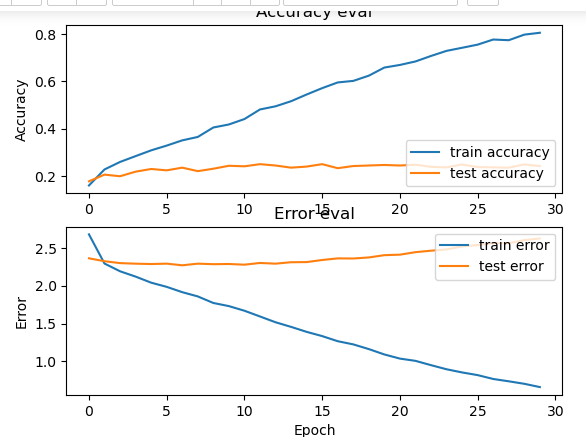

*0)Batch normalization*<br>
*1)3 conv layers*<br>
*2)2 dense layer*<br>
*3)0.18 droupout*<br>
*4)0.12 droupout*<br>
*5)epochs= 120*<br>
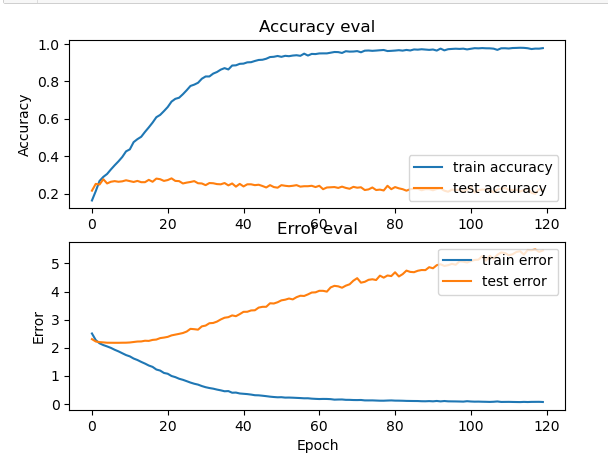

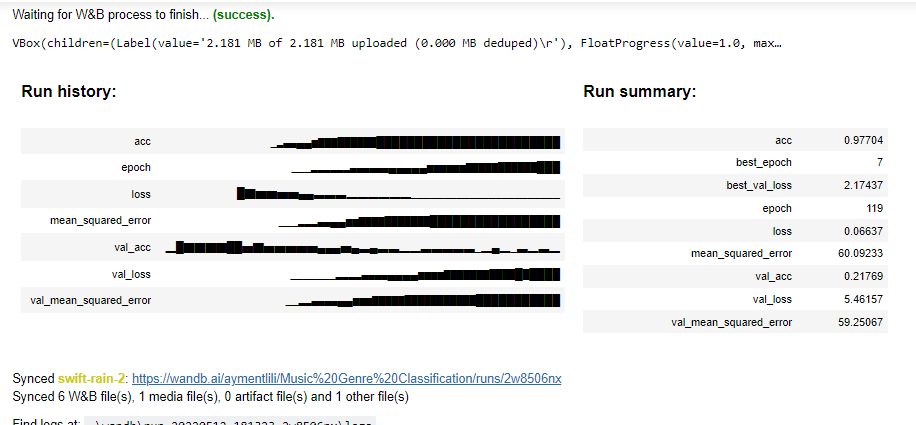

*0)Batch Normalization*<br>
*1)3 conv layers*<br>
*2)2 dense layer*<br>
*3)0.18 droupout*<br>
*4)0.12 droupout*<br>
*5)epochs= 70*<br>
*6)Stratified K-fold cross validation K=7* 

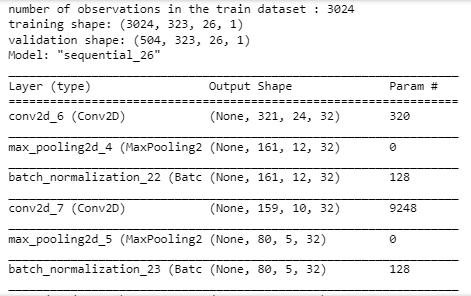

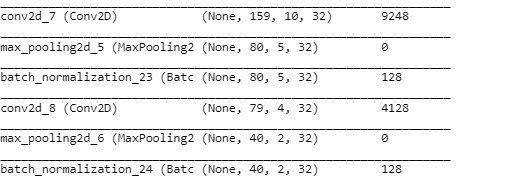

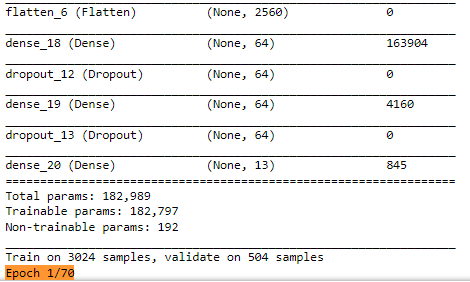

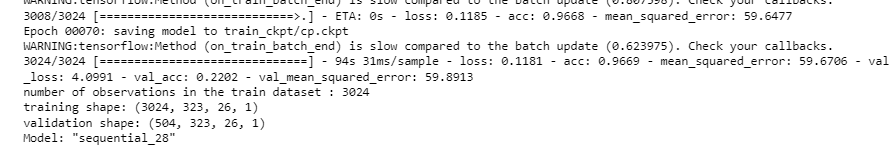

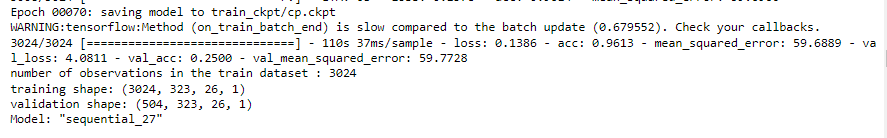

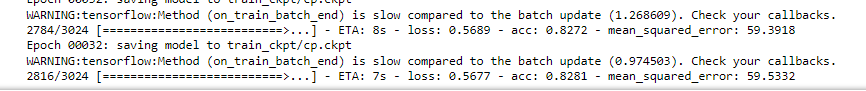

In [ ]:
#### addimage augmentation
#### Create ensemble from model list
#### get all predictions

In [ ]:
all_history

In [ ]:
# evaluate model on test set
test_loss, test_acc,test_mse = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc )

# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

# predict sample
predict(model, X_to_predict, y_to_predict)

In [ ]:
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [ ]:
%tensorboard --logdir logs/fit

In [ ]:

# load data
X, y = load_data(DATA_PATH)

# create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# build network topology
model = keras.Sequential([

# input layer
keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),

# 1st dense layer
keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
keras.layers.Dropout(0.3),

# 2nd dense layer
keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
keras.layers.Dropout(0.3),

# 3rd dense layer
keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
keras.layers.Dropout(0.3),

# output layer
keras.layers.Dense(10, activation='softmax')])
# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

# train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=100)

# plot accuracy and error as a function of the epochs
plot_history(history)